### Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'data with visible but non-linear separation')

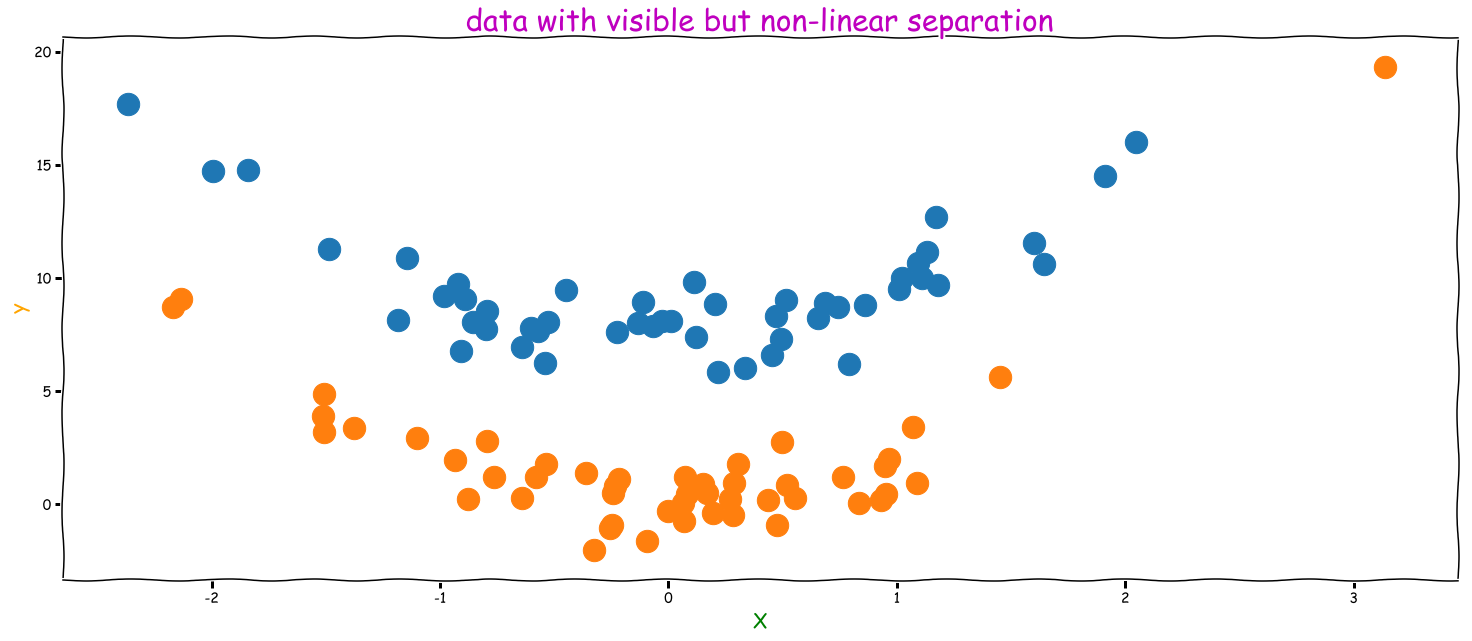

In [3]:
X = np.random.normal(size=100)
X1 = X[0:50]
X2 = X[51:100]

y = 2 * pow(X,2) + 3.5 + np.random.normal(size=100)
y1 = y[0:50]
y2 = y[51:100]


y1 += 3.7
y2 -= 3.7

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X1, y1, cmap=mpl.cm.Paired, marker='o', s=500)
plt.scatter(X2, y2, cmap=mpl.cm.Paired, marker='o', s=500)
plt.xlabel('X', color='green', fontsize=20)
plt.ylabel('y', color='orange', fontsize=20)
plt.title('data with visible but non-linear separation', color='m', fontsize=30)

### Support vector machine with a non-linear kernel

In [162]:
Z = y = np.concatenate([1*np.ones((50,)), -1*np.zeros((50,))])
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.5, random_state=42)
svmfit = SVC(C=40, kernel='rbf', gamma=1).fit(X_train.reshape(-1, 1), Z_train)

In [163]:
svmfit.support_

array([ 5,  9, 12, 14, 17, 18, 24, 25, 26, 28, 30, 31, 35, 40, 41, 43, 46,
       48, 49,  0,  1,  2,  3,  4,  6,  8, 13, 16, 21, 23, 27, 32, 36, 37,
       38, 44, 47], dtype=int32)

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat_train = pd.DataFrame(confusion_matrix(Z_train, svmfit.predict(X_train.reshape(-1,1))).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat_train

,-0.0,1.0
-0.0,21,7
1.0,9,13


In [227]:
class_mat_train = classification_report(Z_train, svmfit.predict(X_train.reshape(-1, 1)))
print(class_mat_train)

              precision    recall  f1-score   support

        -0.0       0.75      0.70      0.72        30
         1.0       0.59      0.65      0.62        20

   micro avg       0.68      0.68      0.68        50
   macro avg       0.67      0.68      0.67        50
weighted avg       0.69      0.68      0.68        50



In [229]:
conf_mat_test = pd.DataFrame(confusion_matrix(Z_test, svmfit.predict(X_test.reshape(-1,1))).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat_test

,-0.0,1.0
-0.0,9,15
1.0,11,15


In [230]:
class_mat_test = classification_report(Z_test, svmfit.predict(X_test.reshape(-1, 1)))
print(class_mat_test)

              precision    recall  f1-score   support

        -0.0       0.38      0.45      0.41        20
         1.0       0.58      0.50      0.54        30

   micro avg       0.48      0.48      0.48        50
   macro avg       0.48      0.47      0.47        50
weighted avg       0.50      0.48      0.49        50



### Support vector classifier (linear kernel)

In [166]:
svmfit_linear = SVC(kernel='linear', C=40).fit(X_train.reshape(-1, 1), Z_train)

In [231]:
conf_mat_linear_train = pd.DataFrame(confusion_matrix(Z_train, svmfit_linear.predict(X_train.reshape(-1,1))).T, index = svmfit_linear.classes_, columns = svmfit.classes_)
conf_mat_linear_train

,-0.0,1.0
-0.0,28,14
1.0,2,6


In [232]:
class_mat_linear_train = classification_report(Z_train, svmfit_linear.predict(X_train.reshape(-1, 1)))
print(class_mat_linear_train)

              precision    recall  f1-score   support

        -0.0       0.67      0.93      0.78        30
         1.0       0.75      0.30      0.43        20

   micro avg       0.68      0.68      0.68        50
   macro avg       0.71      0.62      0.60        50
weighted avg       0.70      0.68      0.64        50



In [231]:
conf_mat_linear_test = pd.DataFrame(confusion_matrix(Z_test, svmfit_linear.predict(X_test.reshape(-1,1))).T, index = svmfit_linear.classes_, columns = svmfit.classes_)
conf_mat_linear_test

,-0.0,1.0
-0.0,28,14
1.0,2,6


In [233]:
class_mat_linear_test = classification_report(Z_test, svmfit_linear.predict(X_test.reshape(-1, 1)))
print(class_mat_linear_test)

              precision    recall  f1-score   support

        -0.0       0.35      0.65      0.46        20
         1.0       0.46      0.20      0.28        30

   micro avg       0.38      0.38      0.38        50
   macro avg       0.41      0.43      0.37        50
weighted avg       0.42      0.38      0.35        50



**Therefore, there is no difference between the performance of a linear and non-linear kernel on training data. But, non-linear kernel outperforms linear kernel on test data.**